In [ ]:
!pip install tqdm seaborn

In [1]:
import numpy as np
import pandas as pd
from tqdm.notebook import tqdm
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns

import os
from glob import glob

In [3]:
data_dir = '/opt/ml/input/data/train'
img_dir = f'{data_dir}/images'
df_path = f'{data_dir}/train.csv'

In [4]:
num2class = ['incorrect_mask', 'mask1', 'mask2', 'mask3', 'mask4', 'mask5', 'normal']
class2num = {k: v for v, k in enumerate(num2class)}
class2num

{'incorrect_mask': 0,
 'mask1': 1,
 'mask2': 2,
 'mask3': 3,
 'mask4': 4,
 'mask5': 5,
 'normal': 6}

In [5]:
df = pd.read_csv(df_path)
df.head()

,id,gender,race,age,path
0,000001,female,Asian,45,000001_female_Asian_45
1,000002,female,Asian,52,000002_female_Asian_52
2,000004,male,Asian,54,000004_male_Asian_54
3,000005,female,Asian,58,000005_female_Asian_58
4,000006,female,Asian,59,000006_female_Asian_59


In [25]:
def get_img_stats(img_dir, img_ids):

    img_info = dict(heights=[], widths=[], means=[], stds=[])

    for img_id in tqdm(img_ids):
        for path in glob(os.path.join(img_dir, img_id, '*')):
            # img_dir: /opt/ml/input/data/train/images
            # img_id: 000001_female_Asian_45
            # path: /opt/ml/input/data/train/images/000001_female_Asian_45/normal.jpg
            #       /opt/ml/input/data/train/images/000001_female_Asian_45/mask1.jpg
            #       /opt/ml/input/data/train/images/000001_female_Asian_45/incorrect_mask.jpg
            #       ...

            img = np.array(Image.open(path))
            h, w, c = img.shape
            # img.shape: (512, 384, 3)

            img_info['heights'].append(h)
            img_info['widths'].append(w)
            img_info['means'].append(img.mean(axis=(0,1)))
            img_info['stds'].append(img.std(axis=(0,1)))

    return img_info

```
for path in glob(os.path.join(img_dir, img_id, '*')):

img = np.array(Image.open(path))

img_info['means'].append(img.mean(axis=(0,1)))
img_info['stds'].append(img.std(axis=(0,1)))
```

In [26]:
img_info = get_img_stats(img_dir, df.path.values[:100])

print(f'Total number of people: {len(df)}')
print(f'Total number of images: {len(df) * 7}')

print(f'Minimum height for dataset: {np.min(img_info["heights"])}')
print(f'Maximum height for dataset: {np.max(img_info["heights"])}')
print(f'Average height for dataset: {int(np.mean(img_info["heights"]))}')
print(f'Minimum width for dataset: {np.min(img_info["widths"])}')
print(f'Maximum width for dataset: {np.max(img_info["widths"])}')
print(f'Average width for dataset: {int(np.mean(img_info["widths"]))}')

print(f'RGB Mean: {np.mean(img_info["means"], axis=0) / 255.}')
print(f'RGB Standard Deviation: {np.mean(img_info["stds"], axis=0) / 255.}')

print(len(img_info["means"]))
print(img_info["means"][0])
print(img_info["means"][0][0])


Total number of people: 2700
Total number of images: 18900
Minimum height for dataset: 512
Maximum height for dataset: 512
Average height for dataset: 512
Minimum width for dataset: 384
Maximum width for dataset: 384
Average width for dataset: 384
RGB Mean: [0.55800916 0.51224077 0.47767341]
RGB Standard Deviation: [0.21817792 0.23804603 0.25183411]
700
[161.307724   150.48141988 141.02656047]
161.30772399902344


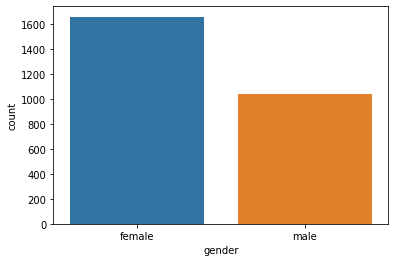

In [40]:
sns.countplot(data=df, x='gender')
plt.show()

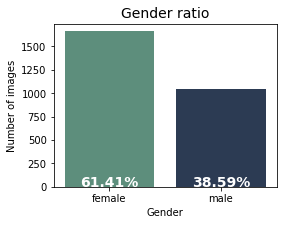

In [42]:
plt.figure(figsize=(4, 3))
ax = sns.countplot(data=df, x='gender', palette=["#55967e", "#263959"])

plt.title('Gender ratio', fontsize=14)
plt.xticks(np.arange(2), ['female', 'male'])
plt.xlabel('Gender')
plt.ylabel('Number of images')

counts = df['gender'].value_counts()
counts_percentage = [f'{element*100:.2f}%' for element in counts/counts.sum()]
for i, v in enumerate(counts_percentage):
    ax.text(i, 0, v, horizontalalignment='center', size=14, color='w', fontweight='bold')

plt.show()

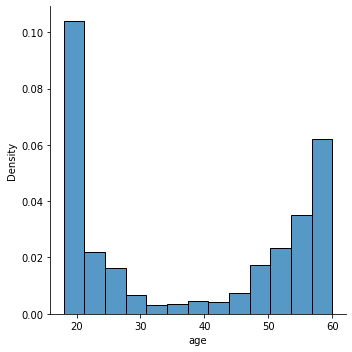

In [45]:
sns.displot(df, x='age')
plt.show()

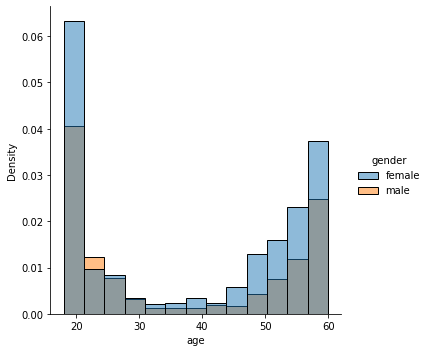

In [46]:
sns.displot(df, x='age', stat='density', hue='gender')
plt.show()

In [47]:
df['age'].describe()

count    2700.000000
mean       37.708148
std        16.985904
min        18.000000
25%        20.000000
50%        36.000000
75%        55.000000
max        60.000000
Name: age, dtype: float64

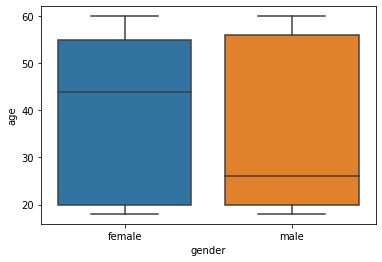

In [48]:
sns.boxplot(data=df, x='gender', y='age')
plt.show()

In [ ]:
def get_ext(img_dir, img_id):
    # img_id: 하위 폴더 이름

    filename = os.listdir(os.path.join(img_dir, img_id))[0]
    ext = os.path.splitext(filename)[-1].lower()

    return ext

In [49]:
img_id = df.iloc[500].path
ext = get_ext(img_dir, img_id)

In [50]:
num2class

['incorrect_mask', 'mask1', 'mask2', 'mask3', 'mask4', 'mask5', 'normal']

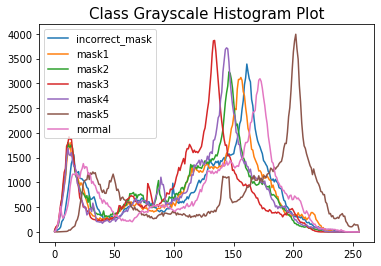

In [57]:
plt.figure()
plt.subplot(1, 1, 1)

for class_id in num2class:
    img = np.array(Image.open(os.path.join(img_dir, img_id, class_id+ext)).convert('L'))
    # 'P': Palette - RGB
    # 'L': Luminance - grayscale
    histogram, _ = np.histogram(img, bins=256, range=(0, 255))
    # bins = intervals
    sns.lineplot(data=histogram)

plt.legend(num2class)
plt.title('Class Grayscale Histogram Plot', fontsize=15)
plt.show()

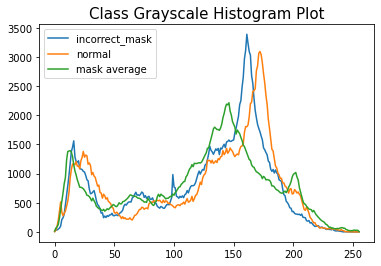

In [58]:
plt.figure()
plt.subplot(1, 1, 1)

img = np.array(Image.open(os.path.join(img_dir, img_id, 'incorrect_mask'+ext)).convert('L'))
histogram, _ = np.histogram(img, bins=256, range=(0, 255))
sns.lineplot(data=histogram)

img = np.array(Image.open(os.path.join(img_dir, img_id, 'normal'+ext)).convert('L'))
histogram, _ = np.histogram(img, bins=256, range=(0, 255))
sns.lineplot(data=histogram)

histograms = []
for i in range(1, 6):
    img = np.array(Image.open(os.path.join(img_dir, img_id, num2class[i]+ext)).convert('L'))
    histogram, _ = np.histogram(img, bins=256, range=(0, 255))
    histograms.append(histogram)
sns.lineplot(data=np.mean(histograms, axis=0))

plt.legend(['incorrect_mask', 'normal', 'mask average'])
plt.title('Class Grayscale Histogram Plot', fontsize=15)
plt.show()

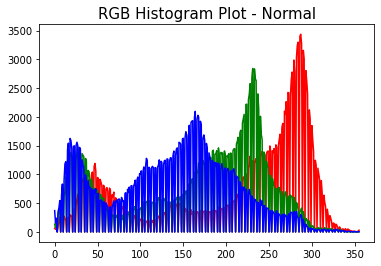

In [63]:
plt.figure()
plt.subplot(1, 1, 1)

img = np.array(Image.open(os.path.join(img_dir, img_id, 'normal'+ext)))
colormap = ['red', 'green', 'blue']
for i in range(3):
    histogram, _ = np.histogram(img[..., i], bins=356, range=(0, 255))
    # '...' is called 'Ellipsis'
    # img.shape: (512, 384, 3)
    # img[:, :, 0] == img[..., 0]
    sns.lineplot(data=histogram, color=colormap[i])

plt.title('RGB Histogram Plot - Normal', fontsize=15)
plt.show()

```
img[:, :, 0] == img[..., 0]
```

In [66]:
def plot_raw_images(img_dir, img_id):
    ext = get_ext(img_dir, img_id)
    img = np.array(Image.open(os.path.join(img_dir, img_id, 'normal'+ext)))

    plt.figure(figsize=(6,6))
    plt.imshow(img)

```
plt.imshow(np_array)
```

In [67]:
def show_from_id(idx):
    
    img_id = df.iloc[idx].path
    gen = df.iloc[idx].gender
    age = df.iloc[idx].age

    plot_raw_images(img_dir, img_id)
    plt.title(f'{gen} {age}')
    plt.show()

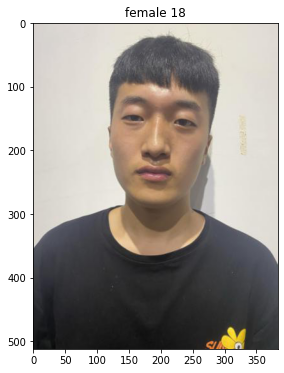

In [68]:
show_from_id(2399) # mislabeled data

In [72]:
def plot_mask_images(img_dir, img_id):
    ext = get_ext(img_dir, img_id)
    imgs = [np.array(Image.open(os.path.join(img_dir, img_id, class_name+ext))) for class_name in num2class[:-1]]

    n_rows, n_cols = 2, 3
    fig, axes = plt.subplots(n_rows, n_cols, sharex=True, sharey=True, figsize=(15,12))
    for i in range(n_rows*n_cols):
        axes[i//(n_rows+1)][i%n_cols].imshow(imgs[i])
        axes[i//(n_rows+1)][i%n_cols].set_title(num2class[i])
    plt.tight_layout
    plt.show()

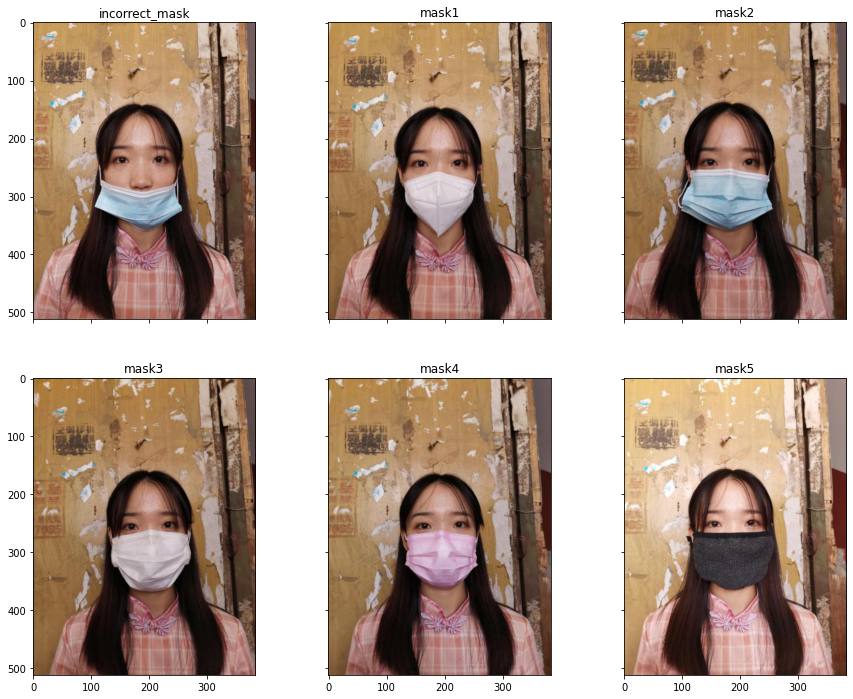

In [73]:
idx = 500
img_id = df.iloc[idx].path
plot_mask_images(img_dir, img_id)